<a href="https://colab.research.google.com/github/neuroscout/neuroscout-cli/blob/colab/Neuroscout_CLI_Colab_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Run Neuroscout on Google Colab

#### 1) Install Neuroscout-CLI & DataLad (for dataset downloading)


In [4]:
%%capture --no-stderr
!wget -O- http://neuro.debian.net/lists/bionic.us-tn.full | sudo tee /etc/apt/sources.list.d/neurodebian.sources.list && sudo apt-key adv --recv-keys --keyserver hkps://keyserver.ubuntu.com 0xA5D32F012649A5A9 && sudo apt-get update
!sudo apt-get install datalad -y
!git config --global user.email "you@example.com" && git config --global user.name "Your Name"
%pip install neuroscout-cli

# Minimize download progress updates
%env DATALAD_UI_PROGRESSBAR=none

#### 2) Run Neuroscout-CLI

Replace the example `analysis_id` (i.e: `iarv7`) with the ID of your own analysis. 

For more information on Neuroscout-CLIs usage type: `!neuroscout --help` or see the [official documentation](https://neuroscout.github.io/neuroscout/cli/usage/).

Note: Google Collab has only 2 CPU threads available

In [5]:
!neuroscout run --n-cpus=2 --datalad-jobs=2 iarv7 /out

INFO:root:Analysis ID : iarv7
INFO:root:Downloading bundle...
INFO:root:Bundle installed at /out/neuroscout-iarv7/sourcedata/bundle
INFO:datalad.core.distributed.clone:Cloning dataset to Dataset(/out/neuroscout-iarv7/sourcedata/Budapest)
INFO:datalad.core.distributed.clone:Attempting to clone from https://github.com/neuroscout-datasets/ds003017.git to /out/neuroscout-iarv7/sourcedata/Budapest
INFO:datalad.gitrepo:Start enumerating objects
INFO:datalad.gitrepo:Finished enumerating objects
INFO:datalad.gitrepo:Start counting objects
INFO:datalad.gitrepo:remote: Counting objects:   0% (1/27665)
INFO:datalad.gitrepo:remote: Counting objects:   1% (277/27665)
INFO:datalad.gitrepo:remote: Counting objects:   2% (554/27665)
INFO:datalad.gitrepo:remote: Counting objects:   3% (830/27665)
INFO:datalad.gitrepo:remote: Counting objects:   4% (1107/27665)
INFO:datalad.gitrepo:remote: Counting objects:   5% (1384/27665)
INFO:datalad.gitrepo:remote: Counting objects:   6% (1660/27665)
INFO:datalad.g

#### 3) Explore results

You can explore uploaded results on [neuroscout.org](https://neuroscout.org) by returning to the analysis builder page for your analysis.

You can also view the local analysis outputs, stored in `/neuroscout-{analysis_id}` in this notebook.

In [6]:
!ls /out/neuroscout-iarv7/

fitlins  options.json  sourcedata


The output directory has two sub folders:
   - `fitlins`: contains the outputs of the model as executed by [FitLins](https://fitlins.readthedocs.io/en/latest/)
   - `sourcedata` includes all of the inputs required for execution, including the preprocessed dataset, and the contents of the Neuroscout analysis bundle (including Predictor events and the BIDS Stats Model JSON spec)

In [7]:

!ls /out/neuroscout-iarv7/fitlins

dataset_description.json
level-dataset_name-dataset_contrast-speech_stat-effect_statmap.nii.gz
level-dataset_name-dataset_contrast-speech_stat-p_statmap.nii.gz
level-dataset_name-dataset_contrast-speech_stat-t_statmap.nii.gz
level-dataset_name-dataset_contrast-speech_stat-variance_statmap.nii.gz
level-dataset_name-dataset_contrast-speech_stat-z_statmap.nii.gz
reports
sub-sid000005
sub-sid000007
sub-sid000009
sub-sid000010
sub-sid000013
sub-sid000020
sub-sid000021
sub-sid000024
sub-sid000025
sub-sid000029


Within the `fitlins` folder, we have `dataset` (i.e. group) level result images, HTML analysis `reports`, as well as subject level results.

For each contrast (in this instance there is only one: `speech`), we have maps of various statistics available. 

Let's take a look at a subject level `t` map for `speech`:

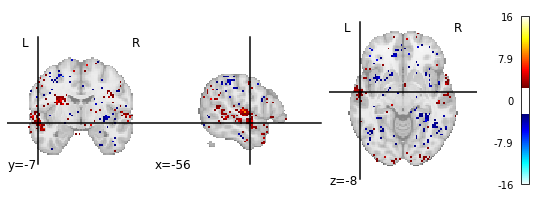

In [10]:
from nilearn.plotting import plot_stat_map
plot_stat_map('/out/neuroscout-iarv7/fitlins/level-dataset_name-dataset_contrast-speech_stat-t_statmap.nii.gz', threshold=2.58)

Even with only 10 subjects (only first run), we see peak activity in the STS for speech, as expected.